**Gowtham Karthikeyan S**

**21BBS0157**

*Course:* Data Mining and Analytics (CBS3007)



---



# Importing Necessary Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Question 1:

Analyze crime data using AR and ARIMA time series techniques on reported incidents of crime based on time and location. Prepare a detailed real time dataset for any specific location and apply ARIMA to predict any.

**Main Dataset Source:** *https://www.kaggle.com/datasets/rajanand/crime-in-india?select=30_Auto_theft.csv*

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give


Forecast DataFrame:
      Forecasted_Auto_Theft_Stolen
Year                              
2011                   4863.863332
2012                   4822.842714
2013                   4817.910113
2014                   4817.316983
2015                   4817.245661


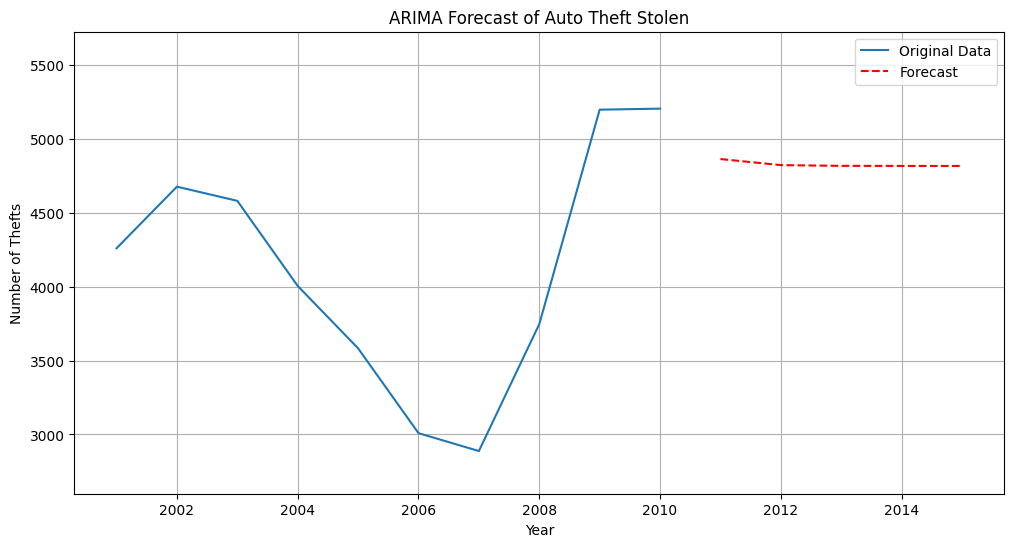

In [14]:
file_path = "auto_theft.csv"
data = pd.read_csv(file_path)

filtered_data = data[(data["Group_Name"] == "AT6-Total") & (data["Area_Name"] == "Tamil Nadu")]

time_series_data = filtered_data[["Year", "Auto_Theft_Stolen"]]
time_series_data.set_index("Year", inplace=True)

adf_result = adfuller(time_series_data["Auto_Theft_Stolen"])
if adf_result[1] > 0.05:
    time_series_diff = time_series_data.diff().dropna()
else:
    time_series_diff = time_series_data

model = ARIMA(time_series_data, order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=5)
forecast_years = range(time_series_data.index.max() + 1, time_series_data.index.max() + 6)

forecast_df = pd.DataFrame({
    "Year": forecast_years,
    "Forecasted_Auto_Theft_Stolen": forecast
}).set_index("Year")

print("\nForecast DataFrame:")
print(forecast_df)

combined_data = pd.concat([time_series_data, forecast_df])

plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label="Original Data")
plt.plot(forecast_df, label="Forecast", linestyle="dashed", color='red')

y_min = min(combined_data["Auto_Theft_Stolen"].min(), forecast_df["Forecasted_Auto_Theft_Stolen"].min()) * 0.9
y_max = max(combined_data["Auto_Theft_Stolen"].max(), forecast_df["Forecasted_Auto_Theft_Stolen"].max()) * 1.1
plt.ylim(y_min, y_max)

plt.title("ARIMA Forecast of Auto Theft Stolen")
plt.xlabel("Year")
plt.ylabel("Number of Thefts")
plt.legend()
plt.grid()
plt.show()


# Question 2:

Use any package and display the visuals of the following on the dataset referred
in Question1.

Moving Average,
Simple moving average,
Autoregressive Moving Average,
exponential moving average
Weighted moving average
Hull Moving Average
Moving average crossover


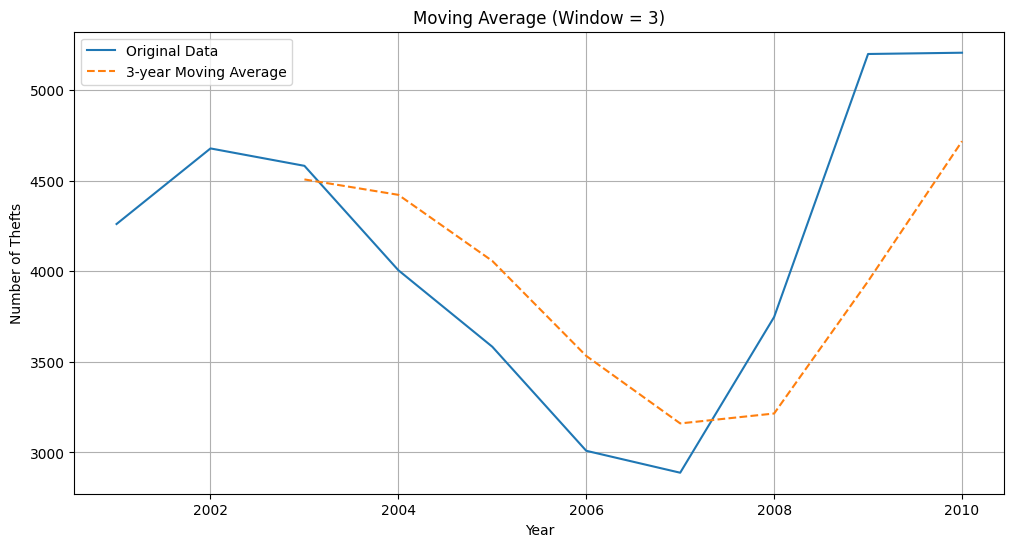

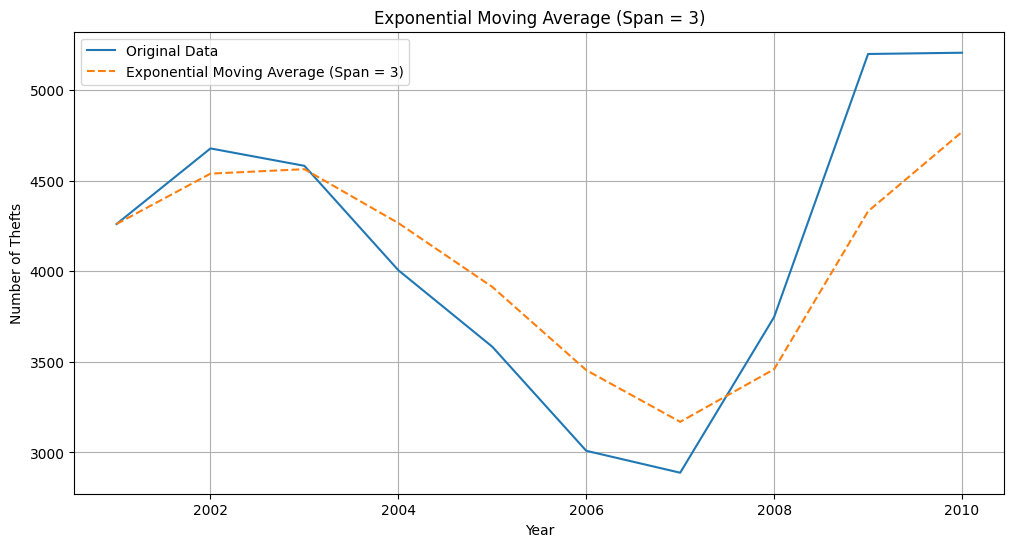

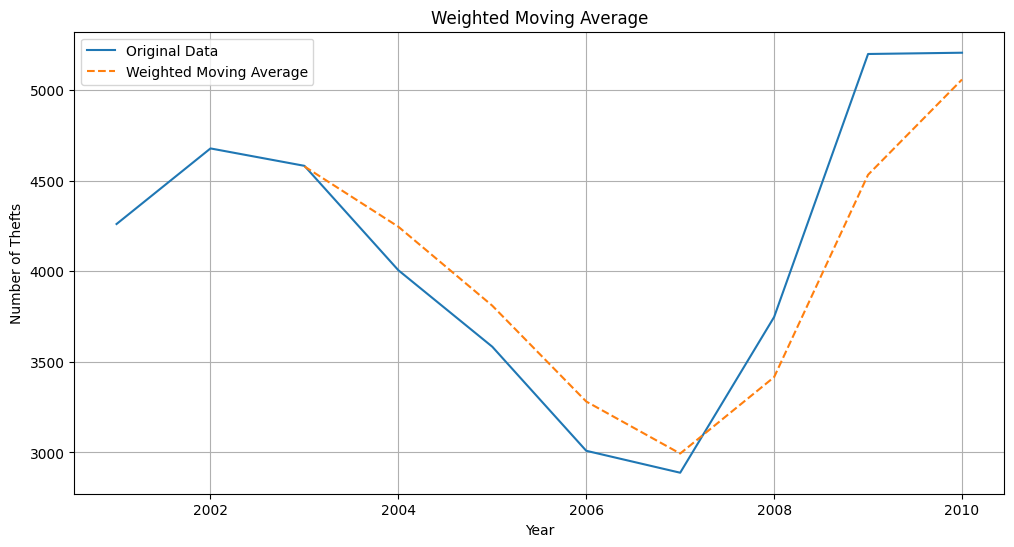

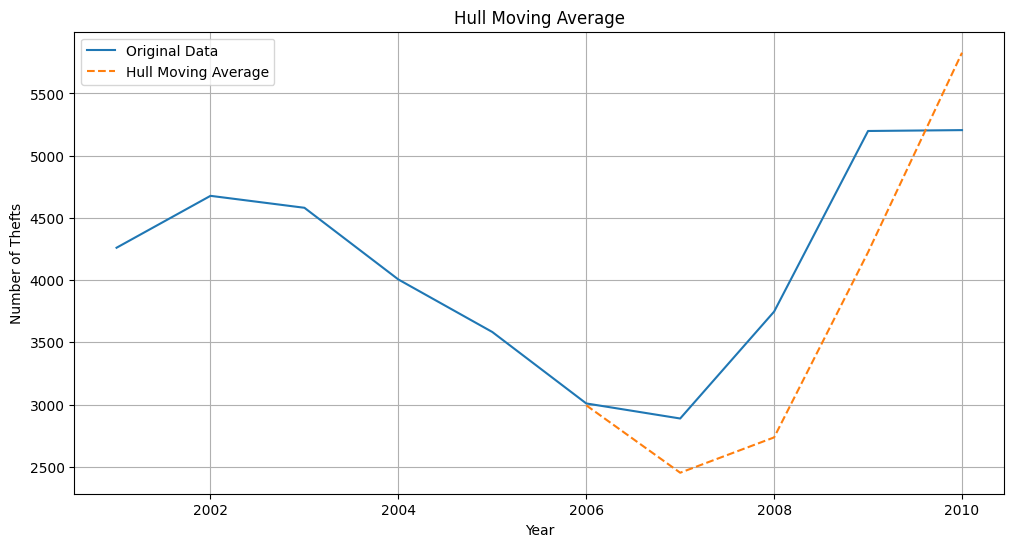

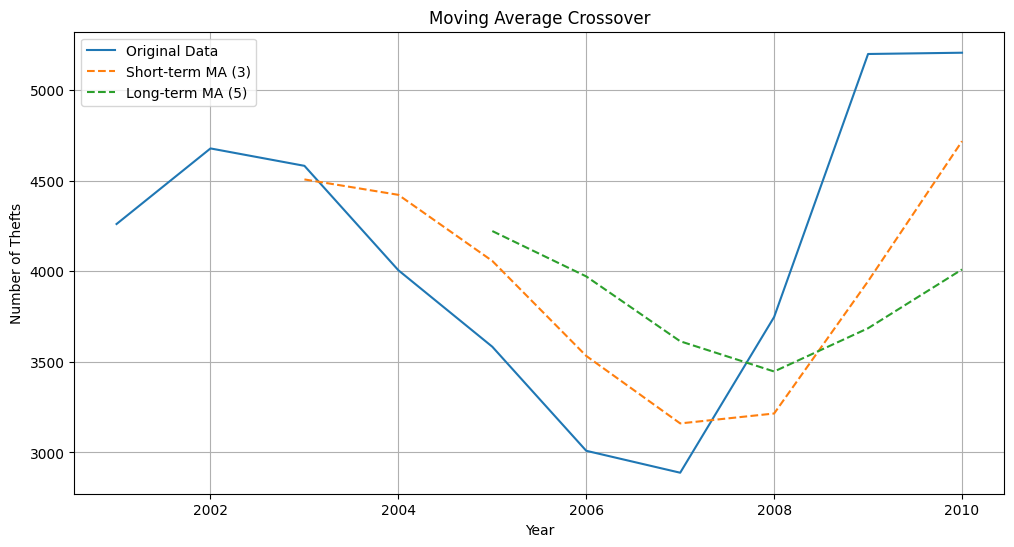

In [ ]:
def plot_moving_averages(series, window):
    ma = series.rolling(window=window).mean()
    plt.figure(figsize=(12, 6))
    plt.plot(series, label="Original Data")
    plt.plot(ma, label=f"{window}-year Moving Average", linestyle="--")
    plt.title(f"Moving Average (Window = {window})")
    plt.xlabel("Year")
    plt.ylabel("Number of Thefts")
    plt.legend()
    plt.grid()
    plt.show()

plot_moving_averages(time_series_data["Auto_Theft_Stolen"], window=3)

def plot_exponential_moving_average(series, span):
    ema = series.ewm(span=span).mean()
    plt.figure(figsize=(12, 6))
    plt.plot(series, label="Original Data")
    plt.plot(ema, label=f"Exponential Moving Average (Span = {span})", linestyle="--")
    plt.title(f"Exponential Moving Average (Span = {span})")
    plt.xlabel("Year")
    plt.ylabel("Number of Thefts")
    plt.legend()
    plt.grid()
    plt.show()

plot_exponential_moving_average(time_series_data["Auto_Theft_Stolen"], span=3)

def plot_weighted_moving_average(series, weights):
    wma = series.rolling(window=len(weights)).apply(lambda x: np.dot(x, weights) / sum(weights), raw=True)
    plt.figure(figsize=(12, 6))
    plt.plot(series, label="Original Data")
    plt.plot(wma, label="Weighted Moving Average", linestyle="--")
    plt.title("Weighted Moving Average")
    plt.xlabel("Year")
    plt.ylabel("Number of Thefts")
    plt.legend()
    plt.grid()
    plt.show()

weights = np.array([0.1, 0.3, 0.6])
plot_weighted_moving_average(time_series_data["Auto_Theft_Stolen"], weights)

def plot_hull_moving_average(series, window):
    half_length = int(window / 2)
    sqrt_length = int(np.sqrt(window))
    wma_half = series.rolling(window=half_length).mean()
    wma_full = series.rolling(window=window).mean()
    hull_ma = (2 * wma_half - wma_full).rolling(window=sqrt_length).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(series, label="Original Data")
    plt.plot(hull_ma, label="Hull Moving Average", linestyle="--")
    plt.title("Hull Moving Average")
    plt.xlabel("Year")
    plt.ylabel("Number of Thefts")
    plt.legend()
    plt.grid()
    plt.show()

plot_hull_moving_average(time_series_data["Auto_Theft_Stolen"], window=5)

def plot_moving_average_crossover(series, short_window, long_window):
    short_ma = series.rolling(window=short_window).mean()
    long_ma = series.rolling(window=long_window).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(series, label="Original Data")
    plt.plot(short_ma, label=f"Short-term MA ({short_window})", linestyle="--")
    plt.plot(long_ma, label=f"Long-term MA ({long_window})", linestyle="--")
    plt.title("Moving Average Crossover")
    plt.xlabel("Year")
    plt.ylabel("Number of Thefts")
    plt.legend()
    plt.grid()
    plt.show()

plot_moving_average_crossover(time_series_data["Auto_Theft_Stolen"], short_window=3, long_window=5)